1. Khai báo các thư viện được sử dụng

In [6]:
import gzip
import numpy as np
import random
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans

2. Đọc dữ liệu

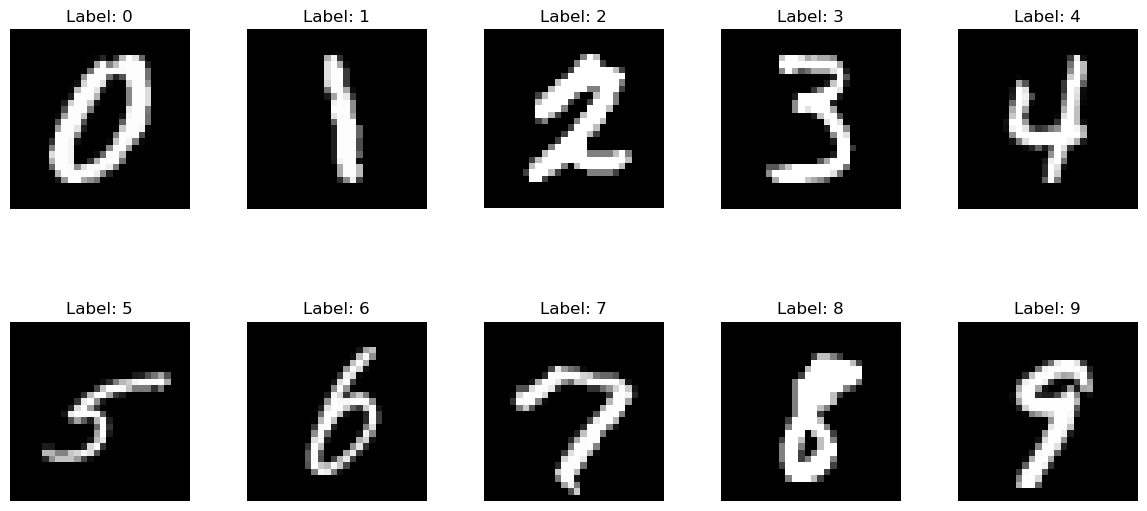

In [7]:
# Đọc dữ liệu ảnh train
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)

# Đọc dữ liệu nhãn train
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)

# Đọc dữ liệu ảnh validation
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    val_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)

# Đọc dữ liệu nhãn validation
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    val_labels = np.frombuffer(f.read(), np.uint8, offset=8)
"""*In ra 10 ảnh tương ứng với 10 labels*"""

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.tight_layout()

for label in range(10):
    # Lấy chỉ mục của ảnh có nhãn tương ứng
    indices = np.where(val_labels == label)[0]
    random_index = random.choice(indices)
    
    # Lấy ảnh và hiển thị
    image = val_images[random_index].reshape(28, 28)
    
    axs[label // 5, label % 5].imshow(image, cmap='gray')
    axs[label // 5, label % 5].set_title(f"Label: {label}")
    axs[label // 5, label % 5].axis('off')

plt.show()

3. Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc 2D.


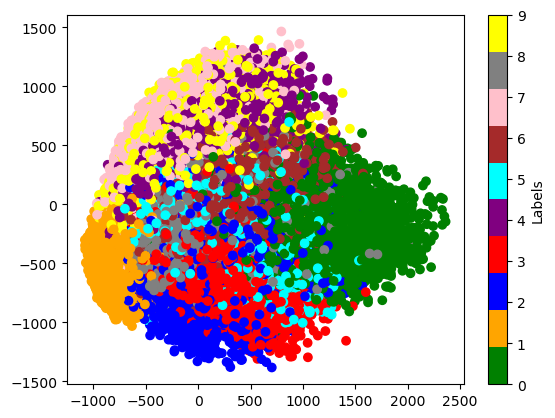

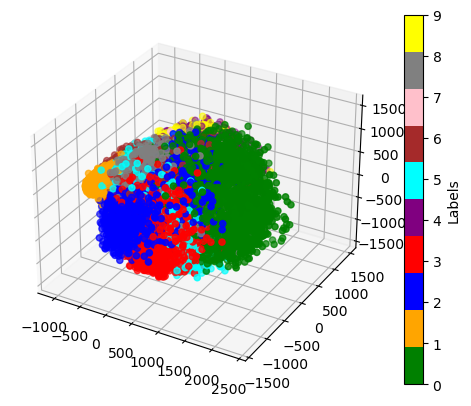

In [8]:
# Áp dụng PCA giảm số chiều dữ liệu
dim_reduction = [2,3]
for i in dim_reduction:
  pca = PCA(n_components=i)
  train_images_pca = pca.fit_transform(train_images)

  # Tạo một bảng màu với 10 màu tương ứng với 10 nhãn
  cmap = ListedColormap(['green', 'orange', 'blue', 'red', 'purple', 'cyan', 'brown', 'pink', 'gray', 'yellow'])

  # Hiển thị dữ liệu trên không gian 2D hoặc 3D
  fig = plt.figure()
  if pca.n_components == 2:
      scatter = plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap=cmap)
  elif pca.n_components == 3:
      ax = fig.add_subplot(111, projection='3d')
      scatter = ax.scatter(train_images_pca[:, 0], train_images_pca[:, 1], train_images_pca[:, 2], c=train_labels, cmap=cmap)

  # Tạo colorbar
  cbar = plt.colorbar(scatter, ticks=np.arange(10))
  cbar.set_label('Labels')

  plt.show()

4. Xây dựng chương trình sử dụng mô hình Naïve Bayes phù hợp để phân loại các hình
ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong
tập validation.

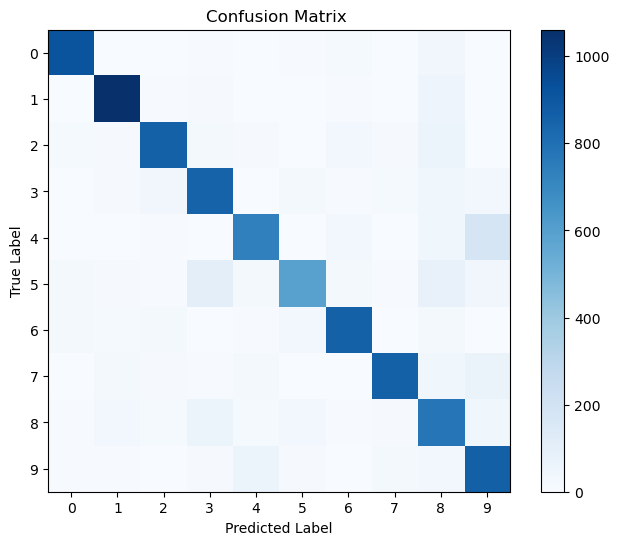

Accuracy: 0.8365
Precision: 0.8433162997126132
Recall: 0.8334531845906966


In [9]:
nb = MultinomialNB()
nb.fit(train_images, train_labels)

# Dự đoán nhãn trên dữ liệu validation
val_pred = nb.predict(val_images)

# Hiển thị các kết quả
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(val_labels, val_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix ")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Accuracy:", accuracy_score(val_labels, val_pred))
print("Precision:", precision_score(val_labels, val_pred, average='macro'))
print("Recall:", recall_score(val_labels, val_pred, average='macro'))

5. Xây dựng mô hình CNN và kiểm tra với dữ liệu validation

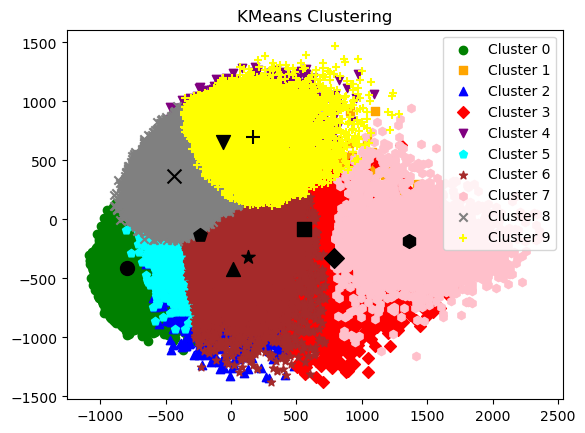

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.7507 - accuracy: 0.8067
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.1544 - accuracy: 0.9600
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.1123 - accuracy: 0.9703
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0900 - accuracy: 0.9762
Epoch 5/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0730 - accuracy: 0.9808
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0656 - accuracy: 0.9827
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0555 - accuracy: 0.9850
Epoch 8/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0519 - accuracy: 0.9858
Epoch 9/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0468 - accuracy: 0.9872
Epoch 10/10
313/313 [==============================] - 2s 6ms/step


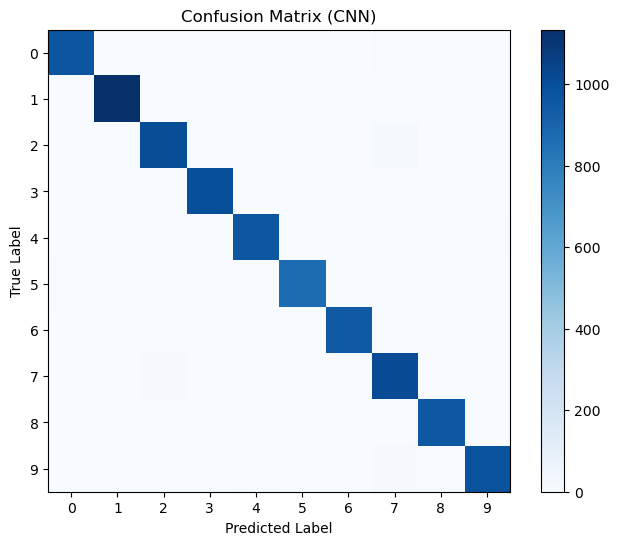

Accuracy (CNN): 0.984
Precision (CNN): 0.9842146769301623
Recall (CNN): 0.9837841191077465


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def kmeans_display(X, label, centers):
    K = len(centers)
    colors = ['green', 'orange', 'blue', 'red', 'purple', 'cyan', 'brown', 'pink', 'gray', 'yellow']
    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'x', '+']
    
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1], marker = markers[k], c=colors[k], label=f'Cluster {k}')
    
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker = markers[i], color='black', s=100)
        
    plt.legend()
    plt.title('KMeans Clustering')
    plt.show()

def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        if len(Xk) > 0:
            centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return np.array_equal(centers, new_centers)

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

X = train_images_pca

K = 10  
(centers, labels, it) = kmeans(X, K)
kmeans_display(X, labels[-1], centers[-1])

# Chuyển đổi kích thước dữ liệu ảnh thành 4D (số mẫu, chiều cao, chiều rộng, số kênh)
train_images_reshape = train_images.reshape(-1, 28, 28, 1)
val_images_reshape = val_images.reshape(-1, 28, 28, 1)

# Chuyển đổi nhãn thành one-hot encoding
train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
val_labels_onehot = tf.keras.utils.to_categorical(val_labels)

# Xây dựng mô hình CNN
model = Sequential()

# Tầng tích chập 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Tầng tích chập 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Tầng tích chập 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dàn phẳng (flatten) dữ liệu trước khi đưa vào fully connected layers
model.add(Flatten())

# Tầng fully connected 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Tầng fully connected 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Tầng đầu ra với softmax
model.add(Dense(10, activation='softmax'))

# Compile và huấn luyện mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_images_reshape, train_labels_onehot, batch_size=128, epochs=10, verbose=1)

# Đánh giá mô hình trên dữ liệu validation
val_pred_cnn = np.argmax(model.predict(val_images_reshape), axis=-1)

# Hiển thị các kết quả
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(val_labels, val_pred_cnn), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (CNN)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Accuracy (CNN):", accuracy_score(val_labels, val_pred_cnn))
print("Precision (CNN):", precision_score(val_labels, val_pred_cnn, average='macro'))
print("Recall (CNN):", recall_score(val_labels, val_pred_cnn, average='macro'))